In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [25]:
df = sns.load_dataset('titanic')

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

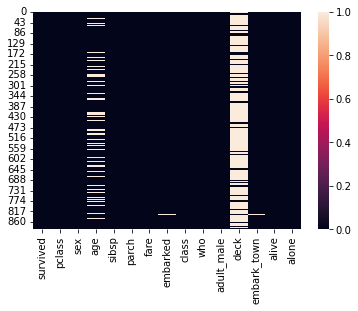

In [7]:
sns.heatmap(df.isnull())

## Handling missing values 

In [13]:
# row wise deletion.
# beacuse of this necessary data is also removed. 
df.dropna().shape  

(182, 15)

In [12]:
df.shape

(891, 15)

In [15]:
# column wise deletion.
df.dropna(axis = 1).shape

(891, 11)

#### Using Imputation Techniques.

##### - Using Mean imputation

###### mean imputation is used on data attribute which is normally distributed. It replaces nan values with mean.

In [27]:
df['age'].isnull().sum()

177

In [28]:
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [29]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


##### - Using median value imputation

##### we use this technique when we have outliers in our data.

In [30]:
df['median_age'] = df['age'].fillna(df['age'].median())

In [31]:
df[['age', 'median_age']]

,age,median_age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


### Mode imputation:

##### we use this imputation on categorical dataset.

In [36]:
df['embarked_mode']=df[df['embarked'].notna()]['embarked'].fillna(df['embarked'].mode())

In [37]:
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [38]:
df['embarked_mode'].isnull().sum()

2

In [39]:
df['embarked'].isnull().sum()

2